In [1]:
import torch
import pytorch_lightning as pl
import torch.nn as nn
from torch.utils.data import DataLoader, random_split,Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
from torch.nn import functional as F
import numpy as np
import math
import random

In [2]:
class DataModule(pl.LightningDataModule):
    
    def __init__(self, batch_size=16):
        super().__init__()
        self.batch_size = batch_size
    
    def prepare_data(self):
        self.train = pd.read_csv(r"C:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\data\fashion-mnist_train.csv", dtype=np.float32)
        self.train['label'] = self.train['label'].astype(int)
        self.train = self.train.head(600)
        self.test = pd.read_csv(r"C:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\data\fashion-mnist_test.csv", dtype=np.float32)
        self.test['label'] = self.test['label'].astype(int)
        self.test = self.test.head(600)

    def setup(self, stage):
        trainY = self.train.label.values
        trainX = self.train.loc[:,self.train.columns != "label"].values/255 
        testY = self.test.label.values
        testX = self.test.loc[:,self.test.columns != "label"].values/255 
        
        if stage == 'fit' or stage is None:
            train_data = torch.utils.data.TensorDataset(torch.from_numpy(trainX).reshape(-1, 1, 28, 28), torch.from_numpy(trainY).type(torch.LongTensor))
            # cada que modifiques la longitud del dataset de entrenamineto modificar el split
            self.train_data, self.val_data = random_split(train_data, [480, 120])
            
        if stage == 'test' or stage is None:
            self.test_data = torch.utils.data.TensorDataset(torch.from_numpy(testX).reshape(-1, 1, 28, 28), torch.from_numpy(testY).type(torch.LongTensor))

    def train_dataloader(self):
        return DataLoader(self.train_data, batch_size=self.batch_size, shuffle=True, num_workers=4)

    def val_dataloader(self):
        return DataLoader(self.val_data, batch_size=self.batch_size, shuffle=False, num_workers=4)

    def test_dataloader(self):
        return DataLoader(self.test_data, batch_size=self.batch_size, shuffle=False, num_workers=4)

In [3]:


options_phase0 = {
    'a_include_BN': [True, False],
    'a_include_bias': [True, False],
    'a_activation_type': [nn.ReLU(), nn.ELU(), nn.LeakyReLU(),nn.SELU()],
    'a_dropout_range': [0,0.1,0.2,0.3],
    'a_pool_type': [nn.MaxPool2d(2), nn.AvgPool2d(2)],

    'b_include_BN': [True, False],
    'b_include_bias': [True, False],
    'b_activation_type': [nn.ReLU(), nn.ELU(), nn.LeakyReLU(),nn.SELU()],
    'b_dropout_range': [0,0.1,0.2,0.3],

    'c_include_BN': [True, False],
    'c_include_bias': [True, False],
    'c_activation_type': [nn.ReLU(), nn.ELU(), nn.LeakyReLU(),nn.SELU()],
    'c_dropout_range': [0,0.1,0.2,0.3],

    'd_include_BN': [True, False],
    'd_include_bias': [True, False],
    'd_activation_type': [nn.ReLU(), nn.ELU(), nn.LeakyReLU(),nn.SELU()],
    'd_dropout_range': [0,0.1,0.2,0.3],

    'b_pool_type': [nn.MaxPool2d(1), nn.AvgPool2d(1)],


    'learning_rate': [0.001,0.0001,0.1,0.01],

    }

In [4]:
def random_hyper():

    return {
    'a_include_BN': options_phase0['a_include_BN'][np.random.randint(len(options_phase0['a_include_BN']))],
    'a_include_bias': options_phase0['a_include_bias'][np.random.randint(len(options_phase0['a_include_bias']))],
    'a_activation_type': options_phase0['a_activation_type'][np.random.randint(len(options_phase0['a_activation_type']))],
    'a_dropout_range': options_phase0['a_dropout_range'][np.random.randint(len(options_phase0['a_dropout_range']))],
    'a_pool_type': options_phase0['a_pool_type'][np.random.randint(len(options_phase0['a_pool_type']))],

    'b_include_BN': options_phase0['a_include_BN'][np.random.randint(len(options_phase0['a_include_BN']))],
    'b_include_bias': options_phase0['a_include_bias'][np.random.randint(len(options_phase0['a_include_bias']))],
    'b_activation_type': options_phase0['a_activation_type'][np.random.randint(len(options_phase0['a_activation_type']))],
    'b_dropout_range': options_phase0['a_dropout_range'][np.random.randint(len(options_phase0['a_dropout_range']))],

    'c_include_BN': options_phase0['a_include_BN'][np.random.randint(len(options_phase0['a_include_BN']))],
    'c_include_bias': options_phase0['a_include_bias'][np.random.randint(len(options_phase0['a_include_bias']))],
    'c_activation_type': options_phase0['a_activation_type'][np.random.randint(len(options_phase0['a_activation_type']))],
    'c_dropout_range': options_phase0['a_dropout_range'][np.random.randint(len(options_phase0['a_dropout_range']))],


    'd_include_BN': options_phase0['a_include_BN'][np.random.randint(len(options_phase0['a_include_BN']))],
    'd_include_bias': options_phase0['a_include_bias'][np.random.randint(len(options_phase0['a_include_bias']))],
    'd_activation_type': options_phase0['a_activation_type'][np.random.randint(len(options_phase0['a_activation_type']))],
    'd_dropout_range': options_phase0['a_dropout_range'][np.random.randint(len(options_phase0['a_dropout_range']))],
    'b_pool_type': options_phase0['b_pool_type'][np.random.randint(len(options_phase0['b_pool_type']))],
    'learning_rate': options_phase0['learning_rate'][np.random.randint(len(options_phase0['learning_rate']))],

    }


In [5]:
class MyModel(pl.LightningModule):
    """_summary_


    """
    
    def __init__(self,output_channels=64,input_channels=16,model=None,fase=0,cromosoma={}):
        super().__init__()
        self.cromosoma = cromosoma
        self.fase = fase
        self.model = model
        self.output_channels = output_channels
        self.input_channels = input_channels


        #primera capa convolucional
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=0,bias=self.cromosoma['a_include_bias'])
        # primera capa de normalizacion
        self.batch_norm_a = nn.BatchNorm2d(16)
        #primera capa de activacion      
        self.funcion_activacion_a = self.cromosoma['a_activation_type']
        #primera capa dropout
        self.dropout_a = nn.Dropout(p=self.cromosoma['a_dropout_range'])
        # primera capa pooling
        self.pool1 = self.cromosoma['a_pool_type']


        #segunda capa convolucional
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, padding=0,bias=self.cromosoma['b_include_bias'])
        # primera capa de normalizacion
        self.batch_norm_b = nn.BatchNorm2d(16)
        #primera capa de activacion      
        self.funcion_activacion_b = self.cromosoma['b_activation_type']
        #primera capa dropout
        self.dropout_b = nn.Dropout(p=self.cromosoma['b_dropout_range'])

        
        #tercera capa convolucional
        self.cnn3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0,bias=self.cromosoma['c_include_bias'])
        # primera capa de normalizacion
        self.batch_norm_c = nn.BatchNorm2d(32)
        #primera capa de activacion      
        self.funcion_activacion_c = self.cromosoma['c_activation_type']
        #primera capa dropout
        self.dropout_c = nn.Dropout(p=self.cromosoma['c_dropout_range'])


        #cuarta capa convolucional
        self.cnn4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=0,bias=self.cromosoma['d_include_bias'])
        #segunda capa normalizacion
        self.batch_norm_d = nn.BatchNorm2d(32)
        #segunda capa de activacion    
        self.funcion_activacion_d = self.cromosoma['d_activation_type']
        #capa dropout
        self.dropout_d = nn.Dropout(p=self.cromosoma['d_dropout_range'])
        #segunda capa pooling
        self.pool2 =self.cromosoma['b_pool_type']

        #capa de salida
        self.fc1 = nn.Linear(32 * 4 * 4, 10)                


    def forward(self, x):

        #primera capa convolucional
        x = self.cnn1(x)
        #hiperparametro cromosoma "incluir batch normalization"
        if self.cromosoma['a_include_BN']:
            x = self.batch_norm_a(x)
        #capa de activacion
        x = self.funcion_activacion_a(x)
        #capa dropout
        x = self.dropout_a(x)
        #capa de activacion
        x = self.pool1(x)

        #segunda capa convolucional
        x = self.cnn2(x)
        #hiperparametro cromosoma "incluir batch normalization"
        if self.cromosoma['b_include_BN']:
            x = self.batch_norm_b(x)
        #capa de activacion
        x = self.funcion_activacion_b(x)
        #capa dropout
        x = self.dropout_b(x)

        #tercera capa convolucional
        x = self.cnn3(x)
        #hiperparametro cromosoma "incluir batch normalization"
        if self.cromosoma['c_include_BN']:
            x = self.batch_norm_c(x)
        #capa de activacion
        x = self.funcion_activacion_c(x)
        #capa dropout
        x = self.dropout_c(x)

        #cuarta capa convolucional
        x = self.cnn4(x)
        #hiperparametro cromosoma "incluir batch normalization"
        if self.cromosoma['d_include_BN']:
            x = self.batch_norm_d(x)
        #segunda funcion de activacion
        x = self.funcion_activacion_d(x)
        #segunda capa dropout 
        x = self.dropout_d(x)
        #segunda capa de pooling

        x = self.pool2(x)


        #flatten
        x = x.view(x.size(0), -1)

        #capa de salida
        x = self.fc1(x)


        return x


    #metodo de entrenamiento
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    #metodo de validacion
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('val_loss', loss, prog_bar=True)
        return loss


    #metodo de test
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss, prog_bar=True)
        return loss

    #metodo de optimizacion de hiperparametros    
    def configure_optimizers(self):
        if self.fase == 0:
            optimizer = torch.optim.SGD(self.parameters(), lr=self.cromosoma['learning_rate'])
        else:
            optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, self.parameters()), lr=self.cromosoma['learning_rate'])
        return optimizer



In [6]:
crom = random_hyper()

In [7]:
crom

{'a_include_BN': False,
 'a_include_bias': True,
 'a_activation_type': ELU(alpha=1.0),
 'a_dropout_range': 0.1,
 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 'b_include_BN': False,
 'b_include_bias': True,
 'b_activation_type': ReLU(),
 'b_dropout_range': 0.1,
 'c_include_BN': False,
 'c_include_bias': True,
 'c_activation_type': SELU(),
 'c_dropout_range': 0,
 'd_include_BN': False,
 'd_include_bias': False,
 'd_activation_type': SELU(),
 'd_dropout_range': 0.3,
 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0),
 'learning_rate': 0.1}

In [8]:
# datamodule = DataModule()
# model = MyModel(cromosoma=crom)

# trainer = pl.Trainer(max_epochs=1)
# trainer.fit(model, datamodule)
# datamodule.setup(stage='test')
# test_loader = datamodule.test_dataloader()
# loss = trainer.test(dataloaders=test_loader)

In [60]:
random.random(),math.exp(-0.3 / 5)

(0.21267929504742622, 0.9417645335842487)

In [115]:
math.exp(-60 /30 )

0.1353352832366127

In [116]:

class Generation:
    def __init__(self,
                 rango_superviviencia,
                 unfitSurvivalProb,
                 mutationRate,
                 numero_mutaciones,
                 factor_enfriamiento,
                 temperatura,
                 individuo,
                 epochs,
                 input_channels=16,
                 endpoint = None,):
        
        #inicializacion de variables
        self.input_channels = input_channels
        self.individuo = individuo
        self.endpoint = endpoint
        self.poblacion = []
        self.poblacion_historia = []
        self.mejores_candidatos = []
        self.generation_number = 0
        self.numero_mutaciones = numero_mutaciones
        self.mutationRate = mutationRate
        self.rango_supervivencia = rango_superviviencia
        self.unfitSurvivalProb = unfitSurvivalProb
        self.epochs = epochs
        self.temperatura = temperatura
        self.factor_enfriamiento = factor_enfriamiento


        #inicializar la clase que carga los datos del modelo
        datamodule = DataModule()
        organismo = MyModel(cromosoma=self.individuo)

        #Configuracion del entrenamiento
        trainer = pl.Trainer(max_epochs=self.epochs)
        #entrenamiento del modelo
        trainer.fit(organismo, datamodule)

        #configuracion del test del modelo
        datamodule.setup(stage='test')
        #carga de los datos test
        test_loader = datamodule.test_dataloader()

        #test del modelo
        loss = trainer.test(dataloaders=test_loader)
        
        self.mejores_candidatos.append([self.individuo,organismo,loss[0]['test_loss']])

    def generate(self):
        '''
        Generate a new generation in the same phase
        '''


        #Mutacion
        self.mutation(individuo=self.individuo)

        organismo = MyModel(cromosoma=self.individuo_candidato)
        trainer = pl.Trainer(max_epochs=self.epochs)
        datamodule = DataModule()
        trainer.fit(organismo, datamodule)
        datamodule.setup(stage='test')
        test_loader = datamodule.test_dataloader()
        loss = trainer.test(dataloaders=test_loader)

        print(self.mejores_candidatos[-1])
        print(loss[0],self.mejores_candidatos[-1][2])
        delta = loss[0]["test_loss"]- self.mejores_candidatos[-1][2]

        #insertar aqui condicional para solo agregar un candidato que tenga una loss function mejor que el candidato previo
        if ((delta) < 0) or (random.random() < math.exp(-60  / self.temperatura)):

            self.mejores_candidatos.append([self.individuo_candidato,organismo,loss[0]['test_loss']])
            self.individuo = self.individuo_candidato
        
        self.generation_number+=1
        
        self.temperatura = self.temperatura*self.factor_enfriamiento
        print(self.temperatura)

    

    def ultima_generacion(self):
        return self.mejores_candidatos

    
    def mutation(self,individuo):
        '''
        One of the gene is to be mutated.
        '''
        self.individuo_candidato = individuo
        for _ in range(self.numero_mutaciones):
            if np.random.rand() <= self.mutationRate:
                indice = np.random.randint(0, len(individuo))
                key = list(self.individuo)[indice]
                self.individuo_candidato[key] = options_phase0[key][np.random.randint(len(options_phase0[key]))]


In [117]:

numero_generaciones = 50
temperatura = 100
factor_enfriamiento = .95
rango_superviviencia = 0.5
unfitSurvivalProb = 0.2
numero_mutaciones = 2
mutationRate = 0.1
epochs = 5



generation = Generation(rango_superviviencia=rango_superviviencia,
                        unfitSurvivalProb=unfitSurvivalProb,
                        mutationRate=mutationRate,
                        epochs = epochs,
                        temperatura=temperatura,
                        factor_enfriamiento=factor_enfriamiento,
                        numero_mutaciones=numero_mutaciones,
                        individuo=crom
                        )
while generation.generation_number < numero_generaciones:
    generation.generate()
    # Last generation is the phase
    # print('I AM THE BEST IN THE PHASE')
    # 
generation.ultima_generacion()




GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_

Sanity Checking: 0it [00:00, ?it/s]

c:\Users\w10\anaconda3\envs\dynamic_forecast\lib\site-packages\pytorch_lightning\loops\fit_loop.py:281: PossibleUserWarning: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
c:\Users\w10\anaconda3\envs\dynamic_forecast\lib\site-packages\pytorch_lightning\trainer\connectors\checkpoint_connector.py:149: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_630\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_630\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.1192677021026611     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_631\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_631\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.4498015642166138     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': False, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_632\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_632\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.230272889137268     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': False, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_633\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_633\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9459488987922668     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': False, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_634\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_634\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9282578825950623     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': False, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_635\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_635\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9531006813049316     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': False, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_636\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_636\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9637718796730042     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': False, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_637\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_637\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0318902730941772     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_638\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_638\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0960655212402344     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_639\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_639\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.341272234916687     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_640\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_640\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9898402690887451     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_641\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_641\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9086706638336182     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_642\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_642\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0033600330352783     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_643\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_643\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.035775065422058     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_644\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_644\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.2386913299560547     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_645\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_645\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0465319156646729     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_646\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_646\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8824914693832397     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_647\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_647\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.913860559463501     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_648\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_648\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.02871572971344      │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_649\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_649\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.1874525547027588     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_650\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_650\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9875438213348389     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_651\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_651\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0697059631347656     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_652\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_652\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.3993374109268188     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_653\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_653\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.135550856590271     │
└───────────────────────────┴───────────────────────────┘

[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_654\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_654\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0026899576187134     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_655\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_655\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.1848037242889404     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_656\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_656\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.030042290687561     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0.1, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b)


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_657\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_657\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9021910429000854     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): 


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_658\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_658\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8938656449317932     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Ba


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_659\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_659\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9307750463485718     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.2, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Ba


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_660\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_660\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9636641144752502     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Ba


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_661\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_661\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8363136053085327     │
└───────────────────────────┴───────────────────────────┘

[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Ba

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_662\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_662\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8790326714515686     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Ba


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_663\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_663\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9220892190933228     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_664\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_664\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7746359705924988     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_665\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_665\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8467652201652527     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_666\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_666\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8459460139274597     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_667\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_667\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0690274238586426     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_668\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_668\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.066078543663025     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_669\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_669\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.863572895526886     │
└───────────────────────────┴───────────────────────────┘

[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_670\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_670\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.177398443222046     │
└───────────────────────────┴───────────────────────────┘

[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_671\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_671\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.799261212348938     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_672\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_672\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0346394777297974     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_673\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_673\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8364054560661316     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_674\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_674\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7612309455871582     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_675\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_675\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8405643105506897     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_676\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_676\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8880472779273987     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_677\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_677\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0763434171676636     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_678\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_678\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.1083898544311523     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_679\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_679\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8097628355026245     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat


   | Name                 | Type        | Params
------------------------------------------------------
0  | cnn1                 | Conv2d      | 416   
1  | batch_norm_a         | BatchNorm2d | 32    
2  | funcion_activacion_a | ELU         | 0     
3  | dropout_a            | Dropout     | 0     
4  | pool1                | MaxPool2d   | 0     
5  | cnn2                 | Conv2d      | 6.4 K 
6  | batch_norm_b         | BatchNorm2d | 32    
7  | funcion_activacion_b | ReLU        | 0     
8  | dropout_b            | Dropout     | 0     
9  | cnn3                 | Conv2d      | 4.6 K 
10 | batch_norm_c         | BatchNorm2d | 64    
11 | funcion_activacion_c | SELU        | 0     
12 | dropout_c            | Dropout     | 0     
13 | cnn4                 | Conv2d      | 9.2 K 
14 | batch_norm_d         | BatchNorm2d | 64    
15 | funcion_activacion_d | ReLU        | 0     
16 | dropout_d            | Dropout     | 0     
17 | pool2                | AvgPool2d   | 0     
18 | fc1     

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_680\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_680\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9613910913467407     │
└───────────────────────────┴───────────────────────────┘

[{'a_include_BN': True, 'a_include_bias': True, 'a_activation_type': ELU(alpha=1.0), 'a_dropout_range': 0, 'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'b_include_BN': False, 'b_include_bias': True, 'b_activation_type': ReLU(), 'b_dropout_range': 0.1, 'c_include_BN': True, 'c_include_bias': True, 'c_activation_type': SELU(), 'c_dropout_range': 0.2, 'd_include_BN': False, 'd_include_bias': False, 'd_activation_type': ReLU(), 'd_dropout_range': 0.1, 'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0), 'learning_rate': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_a): Dropout(p=0, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (batch_norm_b): Bat

[[{'a_include_BN': True,
   'a_include_bias': True,
   'a_activation_type': ELU(alpha=1.0),
   'a_dropout_range': 0,
   'a_pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
   'b_include_BN': False,
   'b_include_bias': True,
   'b_activation_type': ReLU(),
   'b_dropout_range': 0.1,
   'c_include_BN': True,
   'c_include_bias': True,
   'c_activation_type': SELU(),
   'c_dropout_range': 0.2,
   'd_include_BN': False,
   'd_include_bias': False,
   'd_activation_type': ReLU(),
   'd_dropout_range': 0.1,
   'b_pool_type': AvgPool2d(kernel_size=1, stride=1, padding=0),
   'learning_rate': 0.1},
  MyModel(
    (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (funcion_activacion_a): ELU(alpha=1.0)
    (dropout_a): Dropout(p=0.1, inplace=False)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (cnn2): 

In [122]:
lista = generation.ultima_generacion()

In [123]:
loss = [lista[x][2] for x in range(len(lista))]

In [131]:
[x for x in range(len(lista))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [132]:
loss

[1.1192677021026611,
 1.230272889137268,
 0.9459488987922668,
 0.9282578825950623,
 0.9531006813049316,
 1.0318902730941772,
 1.341272234916687,
 0.9898402690887451,
 0.9086706638336182,
 1.0033600330352783,
 0.8824914693832397,
 1.02871572971344,
 1.1874525547027588,
 0.9875438213348389,
 1.135550856590271,
 1.0026899576187134,
 1.030042290687561,
 0.9021910429000854,
 0.8938656449317932,
 0.8363136053085327,
 0.7746359705924988,
 0.7612309455871582]

Text(0.5, 1.0, 'mejores candidatos')

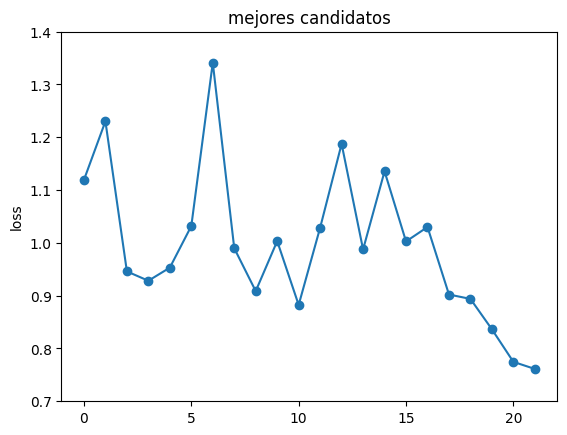

In [140]:
plt.plot(loss)
plt.scatter( [x for x in range(len(lista))],loss)
plt.ylim(0.7,1.4)
plt.ylabel("loss")
plt.title("mejores candidatos")


In [141]:
tmp = 100
lista_tmp = []
lista_tmp.append(tmp)
for x in range(50):
    tmp=tmp*.95
    lista_tmp.append(tmp)


[100,
 95.0,
 90.25,
 85.7375,
 81.45062499999999,
 77.37809374999999,
 73.50918906249998,
 69.83372960937498,
 66.34204312890623,
 63.02494097246091,
 59.87369392383786,
 56.880009227645964,
 54.03600876626366,
 51.33420832795048,
 48.76749791155295,
 46.3291230159753,
 44.012666865176534,
 41.812033521917705,
 39.72143184582182,
 37.73536025353073,
 35.84859224085419,
 34.05616262881148,
 32.3533544973709,
 30.735686772502355,
 29.198902433877237,
 27.738957312183373,
 26.352009446574204,
 25.034408974245494,
 23.782688525533217,
 22.593554099256554,
 21.463876394293724,
 20.390682574579035,
 19.371148445850082,
 18.402591023557576,
 17.482461472379697,
 16.60833839876071,
 15.777921478822675,
 14.98902540488154,
 14.239574134637461,
 13.527595427905588,
 12.851215656510307,
 12.208654873684791,
 11.59822213000055,
 11.018311023500523,
 10.467395472325496,
 9.94402569870922,
 9.44682441377376,
 8.97448319308507,
 8.525759033430816,
 8.099471081759274,
 7.69449752767131]

In [145]:
[math.exp(-60  / x)for x in lista_tmp]

[0.5488116360940265,
 0.5317515301305707,
 0.5143661337700881,
 0.4966794315179029,
 0.4787184708478193,
 0.46051342945655716,
 0.4420976537594453,
 0.423507663834848,
 0.4047831199051811,
 0.38596674542950904,
 0.36710420200126714,
 0.3482439115204119,
 0.32943682156820814,
 0.31073611057986156,
 0.29219683030771665,
 0.27387548421378205,
 0.25582954183643974,
 0.2381168908448696,
 0.22079523041694202,
 0.203921411728774,
 0.18755073368662312,
 0.17173620450499127,
 0.15652778225865002,
 0.1419716100092501,
 0.12810926340688225,
 0.11497703065257718,
 0.10260524622430242,
 0.09101770065418388,
 0.08023114873787224,
 0.07025493771102391,
 0.061090775022718806,
 0.052732652293531024,
 0.04516693784701691,
 0.038372644900179664,
 0.032321876227918586,
 0.026980439106896494,
 0.02230861691563558,
 0.018262076323185394,
 0.014792882006301711,
 0.011850584798299854,
 0.00938334459195872,
 0.007339046644796531,
 0.005666369518739075,
 0.004315764930547923,
 0.0032403143088668806,
 0.00239643

Text(0.5, 1.0, 'disminucion de la temperatura a traves de iteraciones')

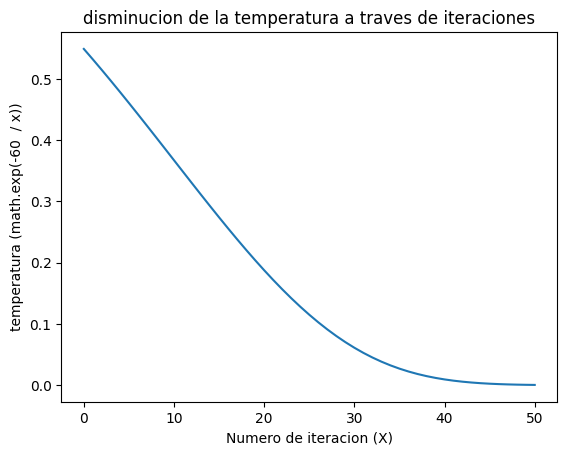

In [150]:
plt.plot([math.exp(-60  / x)for x in lista_tmp])
plt.xlabel("Numero de iteracion (X)")
plt.ylabel("temperatura (math.exp(-60  / x))")
plt.title("disminucion de la temperatura a traves de iteraciones")